In [ ]:
# Install necessary libraries
!pip install pandas numpy scikit-learn tensorflow matplotlib


In [ ]:
import pandas as pd

# Sample football data
data = {
    'Match ID': [1, 2, 3, 4],
    'Team1': ['Manchester Utd', 'Arsenal', 'Tottenham', 'Man City'],
    'Team2': ['Liverpool', 'Chelsea', 'Leicester', 'Brighton'],
    'Odds_Team1': [2.5, 2.1, 1.8, 1.4],
    'Odds_Team2': [2.8, 3.0, 4.2, 6.0],
    'Odds_Draw': [3.2, 3.5, 3.6, 4.0],
    'Result': [0, 1, 0, 0]  # Outcome: 0 for Team1 win, 1 for Team2 win, 2 for Draw
}

# Create DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv('football_sample_dataset.csv', index=False)

# Display the DataFrame
print(df)


   Match ID           Team1      Team2  Odds_Team1  Odds_Team2  Odds_Draw  \
0         1  Manchester Utd  Liverpool         2.5         2.8        3.2   
1         2         Arsenal    Chelsea         2.1         3.0        3.5   
2         3       Tottenham  Leicester         1.8         4.2        3.6   
3         4        Man City   Brighton         1.4         6.0        4.0   

   Result  
0       0  
1       1  
2       0  
3       0  


In [ ]:
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with your actual file
data = pd.read_csv('football_sample_dataset.csv')

# Display basic information
print(data.head())
print(data.info())


   Match ID           Team1      Team2  Odds_Team1  Odds_Team2  Odds_Draw  \
0         1  Manchester Utd  Liverpool         2.5         2.8        3.2   
1         2         Arsenal    Chelsea         2.1         3.0        3.5   
2         3       Tottenham  Leicester         1.8         4.2        3.6   
3         4        Man City   Brighton         1.4         6.0        4.0   

   Result  
0       0  
1       1  
2       0  
3       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Match ID    4 non-null      int64  
 1   Team1       4 non-null      object 
 2   Team2       4 non-null      object 
 3   Odds_Team1  4 non-null      float64
 4   Odds_Team2  4 non-null      float64
 5   Odds_Draw   4 non-null      float64
 6   Result      4 non-null      int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 352.0+ bytes
None


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Team1'] = label_encoder.fit_transform(data['Team1'])
data['Team2'] = label_encoder.fit_transform(data['Team2'])

# Select features and target variable
X = data[['Team1', 'Team2', 'Odds_Team1', 'Odds_Team2', 'Odds_Draw']]
y = data['Result']  # Result should be a column indicating the outcome

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-5-a3d25848dc97>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.7662 - val_accuracy: 1.0000 - val_loss: 0.6605
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.7280 - val_accuracy: 1.0000 - val_loss: 0.6532
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 0.6922 - val_accuracy: 1.0000 - val_loss: 0.6461
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 0.6599 - val_accuracy: 1.0000 - val_loss: 0.6392
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.6287 - val_accuracy: 1.0000 - val_loss: 0.6324
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.5985 - val_accuracy: 1.0000 - val_loss: 0.6257
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.5696 - val_accuracy: 1.0000 - val_loss: 0.6194
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.5420 - val_accuracy: 1.0000 - val_loss: 0.6140
Epoch 9/2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 1.1073
Test Accuracy: 0.00%


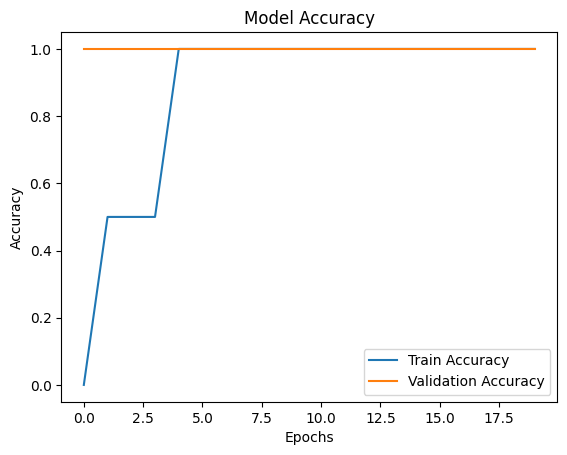

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Convert probabilities to binary labels (e.g., win/lose)
predicted_classes = (predictions > 0.5).astype(int)

# Compare predictions with true labels
print("Predictions vs Actual:", list(zip(predicted_classes.flatten(), y_test)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predictions vs Actual: [(0, 1)]


In [ ]:
import pandas as pd

# Enhanced sample data
data = {
    'Match ID': [1, 2, 3, 4],
    'Team1': ['Manchester Utd', 'Arsenal', 'Tottenham', 'Man City'],
    'Team2': ['Liverpool', 'Chelsea', 'Leicester', 'Brighton'],
    'Odds_Team1': [2.5, 2.1, 1.8, 1.4],
    'Odds_Team2': [2.8, 3.0, 4.2, 6.0],
    'Odds_Draw': [3.2, 3.5, 3.6, 4.0],
    'Result': [0, 1, 0, 0],  # Outcome: 0 for Team1 win, 1 for Team2 win, 2 for Draw
    'Team1_Form': [8, 7, 9, 10],  # Points from last 5 games
    'Team2_Form': [6, 8, 5, 4],  # Points from last 5 games
    'Home_Team': [1, 1, 1, 1],  # Whether Team1 is playing at home
    'Match_Importance': [1, 2, 1, 3],  # Importance level
    'Weather': ['Sunny', 'Rainy', 'Cloudy', 'Sunny'],  # Match weather
    'Key_Players_Absent': [0, 2, 1, 0]  # Number of key players absent
}

# Create DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv('football_enhanced_dataset.csv', index=False)

# Display the DataFrame
print(df)


   Match ID           Team1      Team2  Odds_Team1  Odds_Team2  Odds_Draw  \
0         1  Manchester Utd  Liverpool         2.5         2.8        3.2   
1         2         Arsenal    Chelsea         2.1         3.0        3.5   
2         3       Tottenham  Leicester         1.8         4.2        3.6   
3         4        Man City   Brighton         1.4         6.0        4.0   

   Result  Team1_Form  Team2_Form  Home_Team  Match_Importance Weather  \
0       0           8           6          1                 1   Sunny   
1       1           7           8          1                 2   Rainy   
2       0           9           5          1                 1  Cloudy   
3       0          10           4          1                 3   Sunny   

   Key_Players_Absent  
0                   0  
1                   2  
2                   1  
3                   0  
